In [150]:
import os
import glob
import sys
import numpy as np
import math
import json
import re

from pprint import pprint
from pylab import *
%matplotlib inline

import pandas as pd

prefix = 'finetune/search/alex'

data = []
keys = ['val', 'lr_step', 'n_epochs', 'train_size', 'base_lr', 'momentum', 'weight_decay', 'gamma']
pat = re.compile(prefix + '.' + '\.'.join([key + '-([.0-9e\-]+)' for key in keys]) + '.val_acc.npy')
files = sorted(glob.glob(prefix + '*.val_acc.npy'))
for f in files:
    match = pat.match(f)
    if not match:
        print('No match for', f)
        continue
    with open(f) as accdata:
        acc = np.load(accdata)
    data.append(match.groups() + (acc[0],))
keys.append('initial acc')
df = pd.DataFrame(data=np.array(data, dtype=float32), columns=keys)
df['filename'] = files

#df.sort(columns=['val'], ascending=False)
#df[(df.base_lr > 10**-3.5) & (df.base_lr < 10**-2.5)].plot(x='weight_decay', y='val', kind='scatter', logx=True)
#print(sorted(set(df.base_lr.tolist())))
#print(sorted(set(df.weight_decay.tolist())))
df = df.sort(columns=['val'], ascending=False)
df[['val', 'lr_step', 'n_epochs', 'train_size', 'base_lr', 'momentum', 'weight_decay']][:10]

,val,lr_step,n_epochs,train_size,base_lr,momentum,weight_decay
227,0.719010,969.876404,40,8192,0.002982,0.9,0.067635
226,0.719010,1008.513428,40,8192,0.002982,0.9,0.067635
225,0.718750,969.876404,40,8192,0.001855,0.9,0.067635
224,0.715885,969.876404,40,8192,0.002982,0.9,0.006857
223,0.715104,1008.513428,40,8192,0.002982,0.9,0.006857
222,0.714583,969.876404,40,8192,0.002982,0.9,0.011136
221,0.712240,1008.513428,40,8192,0.002982,0.9,0.011136
220,0.711719,969.876404,40,8192,0.001176,0.9,0.006857
219,0.711719,1008.513428,40,8192,0.001855,0.9,0.011136
218,0.710938,789.838684,40,8192,0.001855,0.9,0.067635


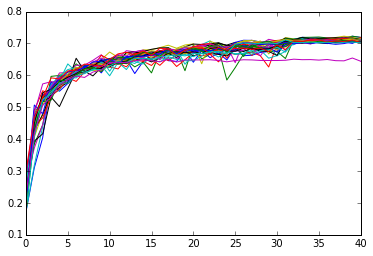

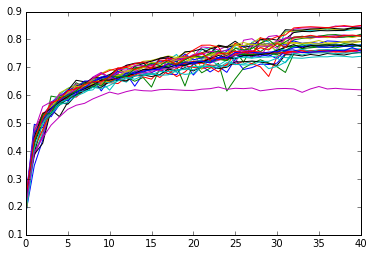

In [151]:
acc = np.array([np.load(f) for f in df[df.n_epochs == 40]['filename'].tolist()])
acc = pd.DataFrame(acc.transpose(1,0))
plt.figure(figsize=(10,10))
acc.plot()
plt.legend().remove()

acc = np.array([np.load(f.replace('val_acc', 'train_acc')) for f in df[df.n_epochs == 40]['filename'].tolist()])
acc = pd.DataFrame(acc.transpose(1,0))
plt.figure(figsize=(10,10))
acc.plot()
plt.legend().remove()